# COCO dataset 탐색

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#!pip install pycocotools scikit-image

In [3]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import random
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### For visualizing the outputs ###
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

아래는 각자 환경 Colab에 맞게 변화 필요

In [5]:
dataDir='../COCOdataset2017'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
print(annFile)

../COCOdataset2017/annotations/instances_val2017.json


In [6]:
# Initialize the COCO api for instance annotations
coco=COCO(annFile)
# Load the categories in a variable
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)

loading annotations into memory...
Done (t=0.57s)
creating index...
index created!


In [7]:
cats

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},

In [8]:
# list of categories within sports things
for i in range (0,80):
    if cats[i]['supercategory'] =='sports':
        print('(id number: ', cats[i]['id'], ') ', cats[i]['name'])
    else:
        continue

(id number:  34 )  frisbee
(id number:  35 )  skis
(id number:  36 )  snowboard
(id number:  37 )  sports ball
(id number:  38 )  kite
(id number:  39 )  baseball bat
(id number:  40 )  baseball glove
(id number:  41 )  skateboard
(id number:  42 )  surfboard
(id number:  43 )  tennis racket


In [9]:
# getting the list of sports category ids
cat_sports = []
for i in range (0,80):
    if cats[i]['supercategory'] =='sports':
        cat_sports.append(cats[i]['name'])
    else:
        continue

print(cat_sports)

['frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket']


In [10]:
sportsIds = coco.getCatIds(catNms=cat_sports)
print(sportsIds)
print(cat_sports)

[34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
['frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket']


In [11]:
d = dict(zip(sportsIds, cat_sports))

In [12]:
d

{34: 'frisbee',
 35: 'skis',
 36: 'snowboard',
 37: 'sports ball',
 38: 'kite',
 39: 'baseball bat',
 40: 'baseball glove',
 41: 'skateboard',
 42: 'surfboard',
 43: 'tennis racket'}

In [13]:
d[34]

'frisbee'

In [14]:
# code to printout the class name
def getClassName(classID, cats):
    for i in range(len(cats)):
        if cats[i]['id']==classID:
            return cats[i]['name']
    return "None"

print('The class name is', getClassName(42, cats))

The class name is surfboard


## 1. Displaying the image

In [15]:
for className in cat_sports:
    catIds = coco.getCatIds(catNms=className)
    imgIds = coco.getImgIds(catIds=catIds)
    print("Number of images for", className, ":", len(imgIds))

Number of images for frisbee : 84
Number of images for skis : 120
Number of images for snowboard : 49
Number of images for sports ball : 169
Number of images for kite : 91
Number of images for baseball bat : 97
Number of images for baseball glove : 100
Number of images for skateboard : 127
Number of images for surfboard : 149
Number of images for tennis racket : 167


In [16]:
filterClasses = ['surfboard'] #type in the class which you want to see
img_no = 97#3 #type in the order of image which you want to see, 60

In [17]:
#resetting the image Id for each class
catIds = coco.getCatIds(catNms=filterClasses)
imgIds = coco.getImgIds(catIds=catIds)
imgIds.sort() #sort the image in order

In [18]:
catIds

[42]

In [19]:
len(imgIds)

149

In [20]:
id_no = imgIds[img_no-1]
print(id_no)

376206


* Only seeing the specific image chosen (원하는 sports class 중 ’몇 번째’ 순서의 이미지 보기)

In [21]:
# load image and the total annotation data
img = coco.loadImgs(id_no)[0] ##### insert specific image ID number
print(img)

{'license': 3, 'file_name': '000000376206.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000376206.jpg', 'height': 427, 'width': 640, 'date_captured': '2013-11-20 23:56:24', 'flickr_url': 'http://farm6.staticflickr.com/5281/5356549016_258572ffb2_z.jpg', 'id': 376206}


In [22]:
img['id']

376206

../COCOdataset2017/val2017/000000376206.jpg


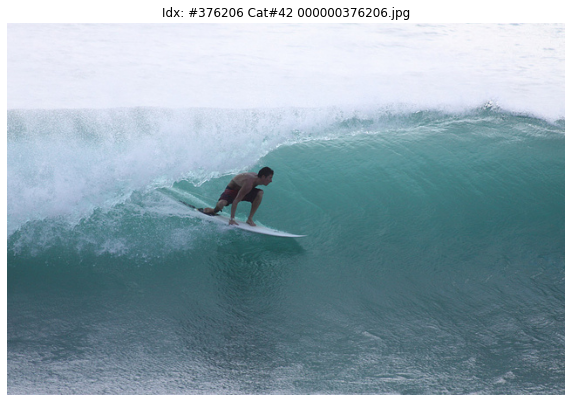

In [23]:
fn_img = '{}/{}/{}'.format(dataDir,dataType,img['file_name'])
print(fn_img)
I = io.imread(fn_img)/255.0 #digital data of an image

fig = plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(I)
title = 'Idx: #{} Cat#{} {}'.format(img['id'], catIds[0], img['file_name'])
plt.title(title)
plt.show()


## 2.  Load the annotations of the Image

In [24]:
# img['id'] 해당 이미지의 annotions ID 가져오기
annIds = coco.getAnnIds(imgIds=img['id'], catIds=sportsIds, iscrowd=None)
print(annIds)

anns = coco.loadAnns(annIds)
print(anns)

[647571]
[{'segmentation': [[287.43, 233.05, 302.4, 238.14, 324.86, 243.53, 339.24, 243.53, 346.12, 244.43, 337.44, 246.23, 306.3, 244.73, 278.74, 239.34, 258.38, 234.25, 255.39, 232.75, 261.98, 233.05, 262.27, 232.45, 267.66, 233.35, 261.98, 227.36, 261.38, 225.57, 273.35, 228.86, 277.85, 233.05, 286.53, 234.85], [242.21, 218.38, 255.69, 222.87, 254.49, 227.66, 253.59, 231.56, 234.72, 224.07, 224.24, 220.18, 235.32, 221.07, 241.91, 217.78], [217.95, 212.69, 198.79, 203.71, 173.34, 191.73, 163.15, 188.73, 178.13, 199.81, 218.85, 219.58, 223.64, 220.78, 221.85, 217.78, 215.26, 212.69]], 'area': 912.33125, 'iscrowd': 0, 'image_id': 376206, 'bbox': [163.15, 188.73, 182.97, 57.5], 'category_id': 42, 'id': 647571}]


In [25]:
print("Number of annotations : ", len(anns))

Number of annotations :  1


In [26]:
anns[0]['bbox']

[163.15, 188.73, 182.97, 57.5]

In [27]:
anns[0]['segmentation']

[[287.43,
  233.05,
  302.4,
  238.14,
  324.86,
  243.53,
  339.24,
  243.53,
  346.12,
  244.43,
  337.44,
  246.23,
  306.3,
  244.73,
  278.74,
  239.34,
  258.38,
  234.25,
  255.39,
  232.75,
  261.98,
  233.05,
  262.27,
  232.45,
  267.66,
  233.35,
  261.98,
  227.36,
  261.38,
  225.57,
  273.35,
  228.86,
  277.85,
  233.05,
  286.53,
  234.85],
 [242.21,
  218.38,
  255.69,
  222.87,
  254.49,
  227.66,
  253.59,
  231.56,
  234.72,
  224.07,
  224.24,
  220.18,
  235.32,
  221.07,
  241.91,
  217.78],
 [217.95,
  212.69,
  198.79,
  203.71,
  173.34,
  191.73,
  163.15,
  188.73,
  178.13,
  199.81,
  218.85,
  219.58,
  223.64,
  220.78,
  221.85,
  217.78,
  215.26,
  212.69]]

In [28]:
# get the class name of each annotations
a = []
for i in range(len(anns)):
    a.append(getClassName(anns[i]['category_id'], cats))

# Now, filter out the repeated images
unique_a = [] #list of unique values of category annotations
for i in range(len(a)):
    if a[i] not in unique_a:
        unique_a.append(a[i])
        
print(unique_a)    

['surfboard']


In [29]:
#print out the number of annotation for each type of categories
for i in unique_a:
    ann_name = coco.getCatIds(catNms=i)
    print("Number of ", i, "(class no.", ann_name[0], ") :", a.count(i))

Number of  surfboard (class no. 42 ) : 1


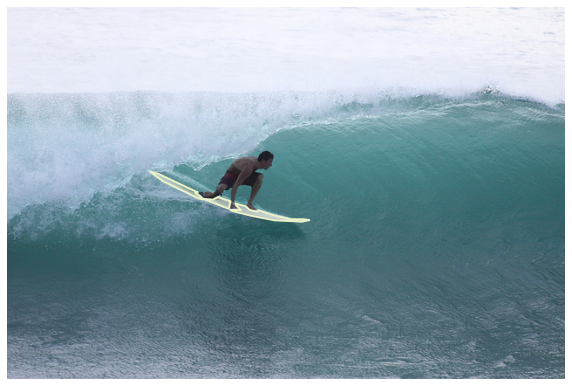

In [30]:
# Load and display instance annotations of the selected category
fig = plt.figure(figsize=(10,10))#, dpi=150
plt.imshow(I)
plt.axis('off')

coco.showAnns(anns) # COCO 제공 함수를 이용하여 그려보기

## 3. View the bbox of the sports annotations

The bbox value (x,y,w,h) for surfboard (id.647571) : 
 [163.15, 188.73, 182.97, 57.5]


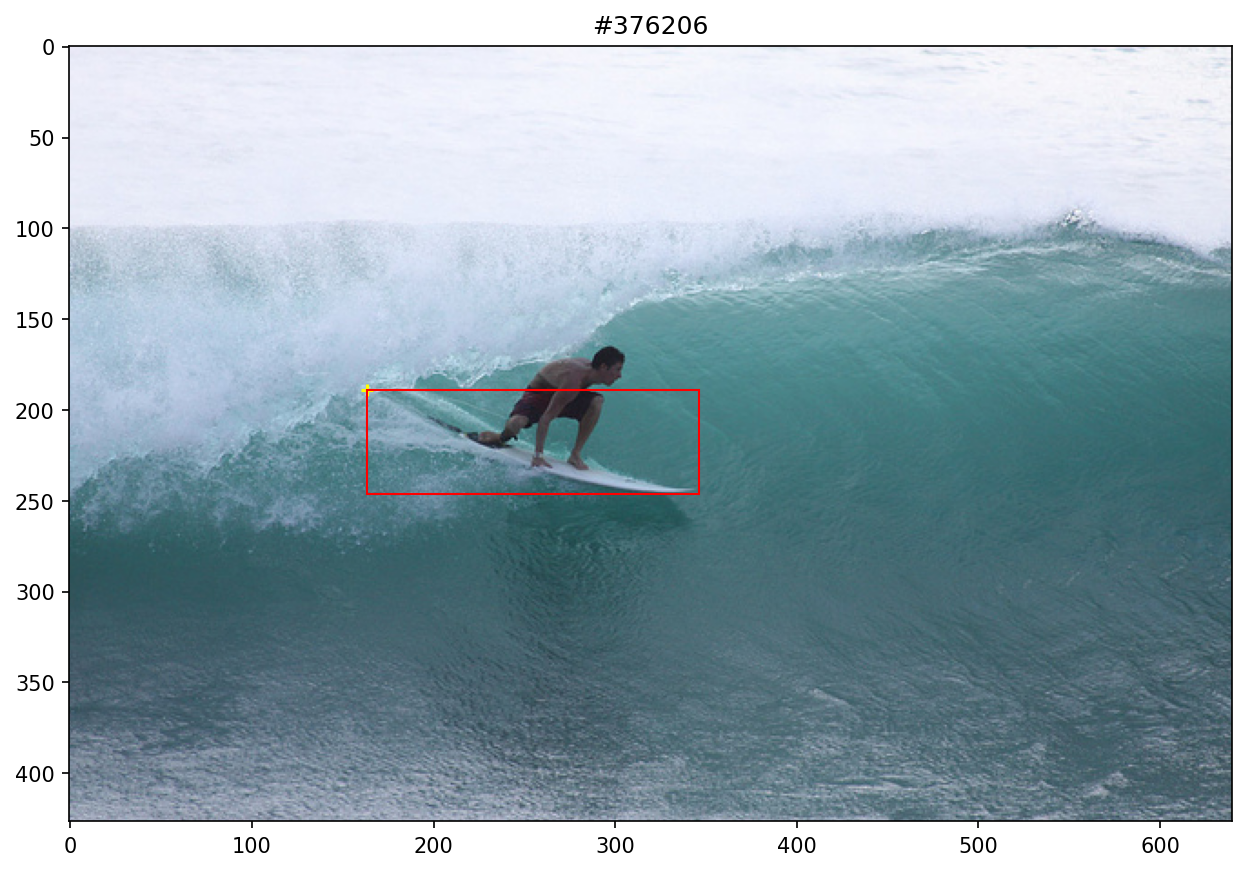

In [31]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(10,10), dpi=150)

# Display the image
plt.imshow(I)
plt.axis()

for i in range(len(anns)): #
    print("The bbox value (x,y,w,h) for {} (id.{})".format(getClassName(anns[i]['category_id'], cats),anns[i]['id']),
          ": \n", anns[i]['bbox'])
    [x,y,w,h] = anns[i]['bbox']
    
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.scatter(x,y, marker='+',c='yellow')
    
plt.title('#{}'.format(img['id']))    
plt.show()


## 4. View the masks/segmentation of the sports annotations

The area of the surfboard (id.647571)  mask : 912.33


Text(0.5, 1.0, 'Mask of #376206')

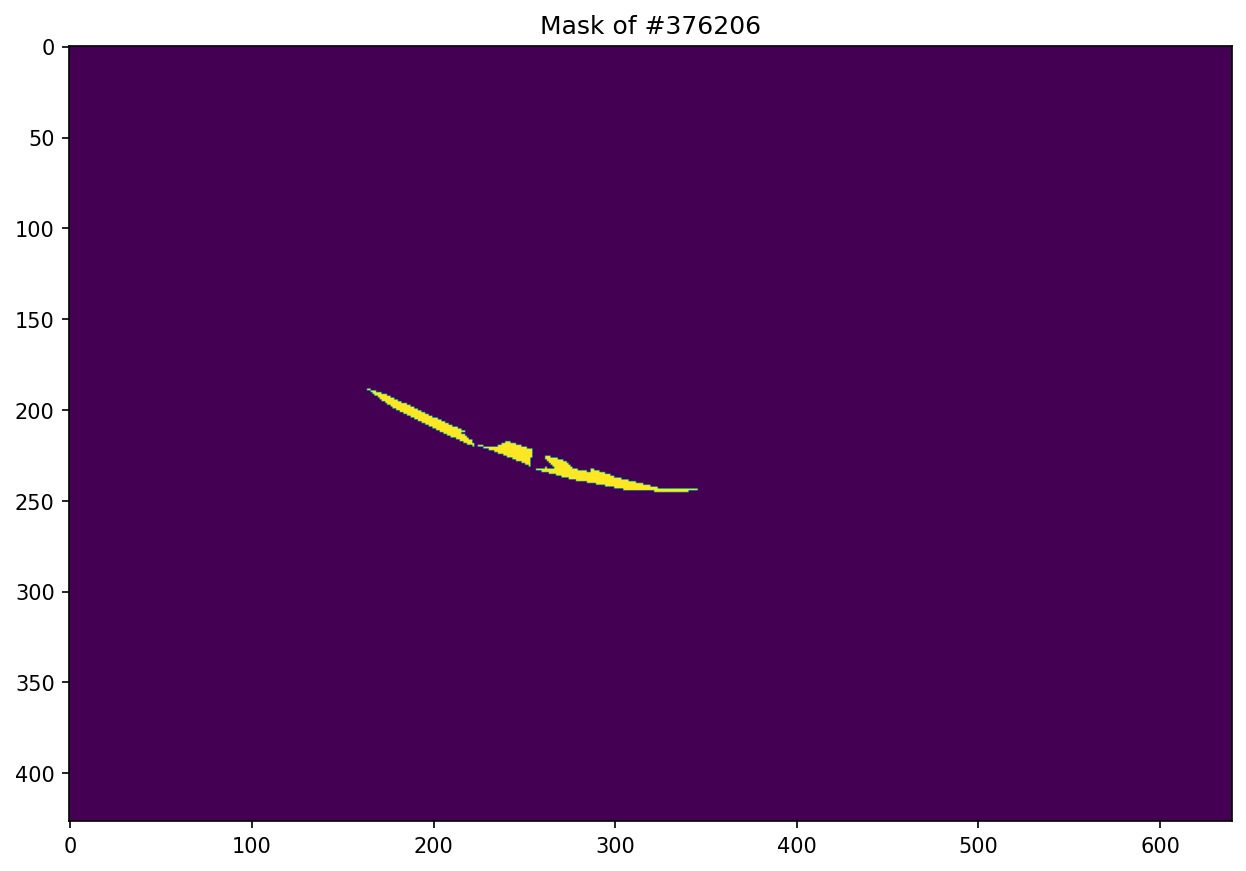

In [32]:
#### GENERATE A SEGMENTATION MASK ####
fig, ax = plt.subplots(figsize=(10,10), dpi=150)
mask = np.zeros((img['height'],img['width']))

for i in range(len(anns)):
    print("The area of the {} (id.{})".format(getClassName(anns[i]['category_id'], cats),anns[i]['id']),
          " mask :", round(anns[i]['area'],2))
    
    className = getClassName(anns[i]['category_id'], cats)
#     print(className)
    # index value of the specific class + 1
    pixel_value = cat_sports.index(className)+1
#     print(pixel_value)
    # pixel_value allows no overlap of each masks
    mask = np.maximum(coco.annToMask(anns[i])*pixel_value, mask)
#     print(mask)
plt.imshow(mask)
plt.title('Mask of #{}'.format(img['id']))

## 5. Plotting the segmentation area

In [33]:
len(anns[0]['segmentation'][0]) //2

18

In [34]:
X = anns[0]['segmentation'][0][::2]   #0 부터 2씩 ->짝수
Y = anns[0]['segmentation'][0][1::2]  # 1부터 2씩 -> 홀수

X = np.array(X)
Y = np.array(Y)

In [35]:
X = np.hstack( (X, X[0])) #close-loop
Y = np.hstack( (Y, Y[0]))

In [36]:
print(X)
print(Y)

[287.43 302.4  324.86 339.24 346.12 337.44 306.3  278.74 258.38 255.39
 261.98 262.27 267.66 261.98 261.38 273.35 277.85 286.53 287.43]
[233.05 238.14 243.53 243.53 244.43 246.23 244.73 239.34 234.25 232.75
 233.05 232.45 233.35 227.36 225.57 228.86 233.05 234.85 233.05]


(250.8535, 350.6565, 224.537, 247.26299999999998)

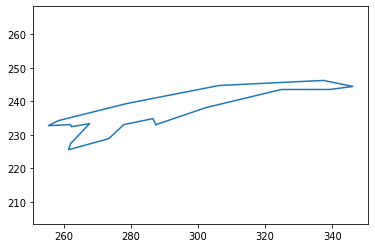

In [37]:
plt.plot(X, Y)
plt.axis('equal')

In [38]:
for i in range(len(anns)):
    a = getClassName(anns[i]['category_id'], cats)
    #for data that has more than one segmentation set
    b=0
    for j in range(len(anns[i]['segmentation'])):
        b = b+len(anns[i]['segmentation'][j])
        print("Number of segmentation points (x,y) of", a, "(annotation id.{})".format(anns[i]['id']), ") :", int(b/2))

Number of segmentation points (x,y) of surfboard (annotation id.647571) ) : 18
Number of segmentation points (x,y) of surfboard (annotation id.647571) ) : 26
Number of segmentation points (x,y) of surfboard (annotation id.647571) ) : 35


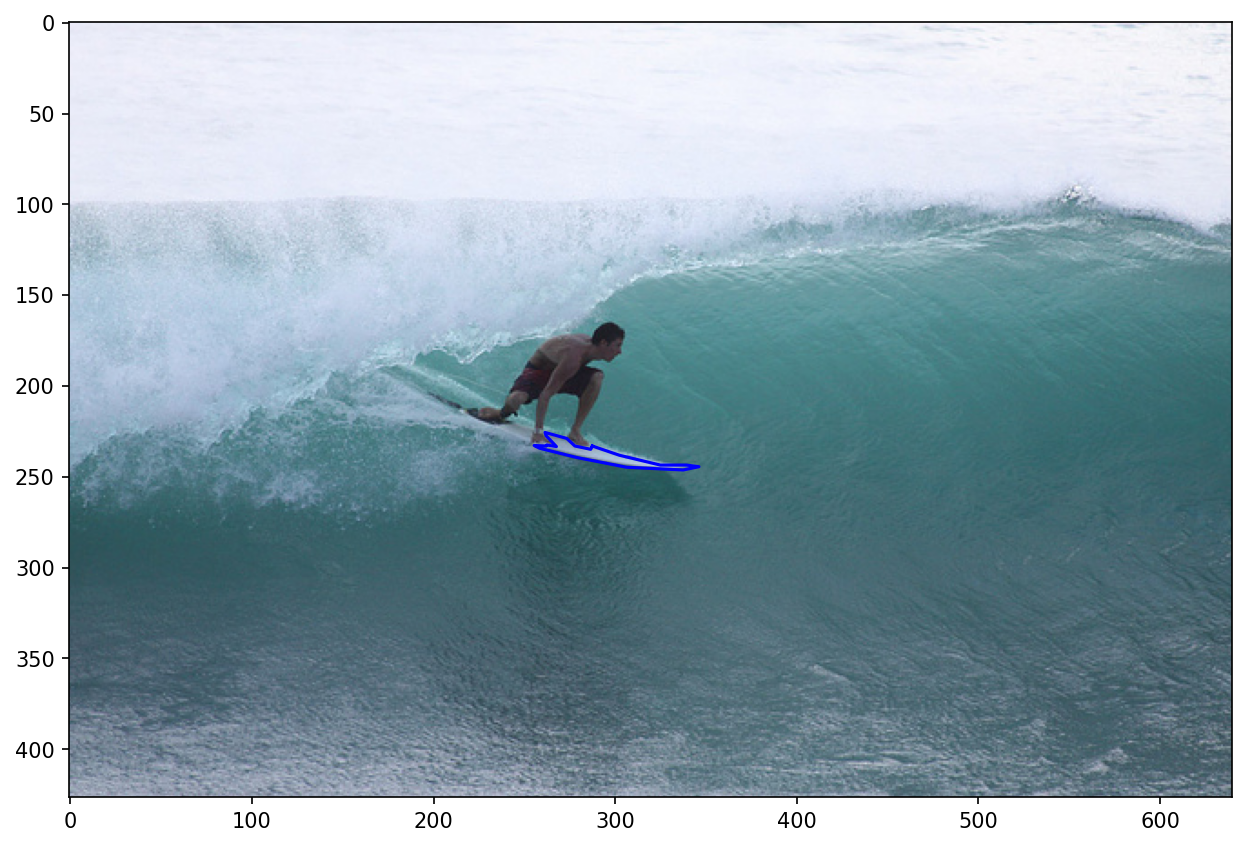

In [39]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(10,10), dpi=150)

# Display the image
plt.imshow(I)
plt.axis()
colors = ['blue', 'green', 'red', 'c', 'm', 'y', 'k', 'w']
for i in range(len(anns)):
    plt.plot(X, Y, color = colors[i])

## 7. Drawing bbox and mask

In [40]:
[x,y,w,h] = anns[0]['bbox']
print([x,y,w,h])

[163.15, 188.73, 182.97, 57.5]


[{'segmentation': [[287.43, 233.05, 302.4, 238.14, 324.86, 243.53, 339.24, 243.53, 346.12, 244.43, 337.44, 246.23, 306.3, 244.73, 278.74, 239.34, 258.38, 234.25, 255.39, 232.75, 261.98, 233.05, 262.27, 232.45, 267.66, 233.35, 261.98, 227.36, 261.38, 225.57, 273.35, 228.86, 277.85, 233.05, 286.53, 234.85], [242.21, 218.38, 255.69, 222.87, 254.49, 227.66, 253.59, 231.56, 234.72, 224.07, 224.24, 220.18, 235.32, 221.07, 241.91, 217.78], [217.95, 212.69, 198.79, 203.71, 173.34, 191.73, 163.15, 188.73, 178.13, 199.81, 218.85, 219.58, 223.64, 220.78, 221.85, 217.78, 215.26, 212.69]], 'area': 912.33125, 'iscrowd': 0, 'image_id': 376206, 'bbox': [163.15, 188.73, 182.97, 57.5], 'category_id': 42, 'id': 647571}]
The bbox value for surfboard (id.647571) : [163.15, 188.73, 182.97, 57.5]
Color of the surfboard (id.647571) : blue 



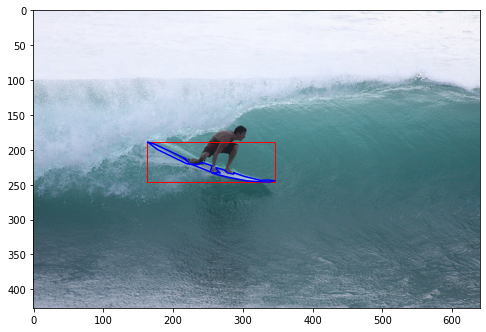

In [41]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(8,8)) #dpi=150

# Display the image
plt.imshow(I)
plt.axis()

print(anns)

colors = ['blue', 'green', 'red', 'cyan', 'm', 'y', 'k', 'w']

for i in range(len(anns)):
    print("The bbox value for {} (id.{})".format(getClassName(anns[i]['category_id'], cats),anns[i]['id']), ":",anns[i]['bbox'])
    [x,y,w,h] = anns[i]['bbox']
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    for t in range(len(anns[i]['segmentation'])):
        #making empty list for verifying x and y axis
        xs =[]
        ys =[]
        for j in range(len(anns[i]['segmentation'][t])):
            if j%2 == 0:
                xs.append(anns[i]['segmentation'][t][j])
            else:
                ys.append(anns[i]['segmentation'][t][j])
        #repeat the first point to create a 'closed loop'
        xs.append(xs[0])
        ys.append(ys[0])
        
        plt.plot(xs, ys, color = colors[i])
#         plt.scatter(xs, ys, color=colors[i-1])
    print("Color of the {} (id.{})".format(getClassName(anns[i]['category_id'],cats), anns[i]['id']), ":", colors[i], "\n")
    
plt.show()


## 8. Summary of the Image

In [42]:
filterClasses = ['surfboard'] #type in the class which you want to see
#img_no = 3 #type in the order of image which you want to see

In [43]:
#resetting the image Id for each class
catIds = coco.getCatIds(catNms=filterClasses)
imgIds = coco.getImgIds(catIds=catIds)
imgIds.sort() #sort the image in order
id_no = imgIds[img_no-1]

File Name: 000000376206.jpg 

ID number of the image:  376206 

The 97th image of the surfboard 

Image directory: ../COCOdataset2017/images/val2017/000000376206.jpg 

Size of the image(w X h): 640 X 427 

Date Captured: 2013-11-20 23:56:24 

[{'segmentation': [[287.43, 233.05, 302.4, 238.14, 324.86, 243.53, 339.24, 243.53, 346.12, 244.43, 337.44, 246.23, 306.3, 244.73, 278.74, 239.34, 258.38, 234.25, 255.39, 232.75, 261.98, 233.05, 262.27, 232.45, 267.66, 233.35, 261.98, 227.36, 261.38, 225.57, 273.35, 228.86, 277.85, 233.05, 286.53, 234.85], [242.21, 218.38, 255.69, 222.87, 254.49, 227.66, 253.59, 231.56, 234.72, 224.07, 224.24, 220.18, 235.32, 221.07, 241.91, 217.78], [217.95, 212.69, 198.79, 203.71, 173.34, 191.73, 163.15, 188.73, 178.13, 199.81, 218.85, 219.58, 223.64, 220.78, 221.85, 217.78, 215.26, 212.69]], 'area': 912.33125, 'iscrowd': 0, 'image_id': 376206, 'bbox': [163.15, 188.73, 182.97, 57.5], 'category_id': 42, 'id': 647571}]
Number of annotations :  1 

Id number of the 

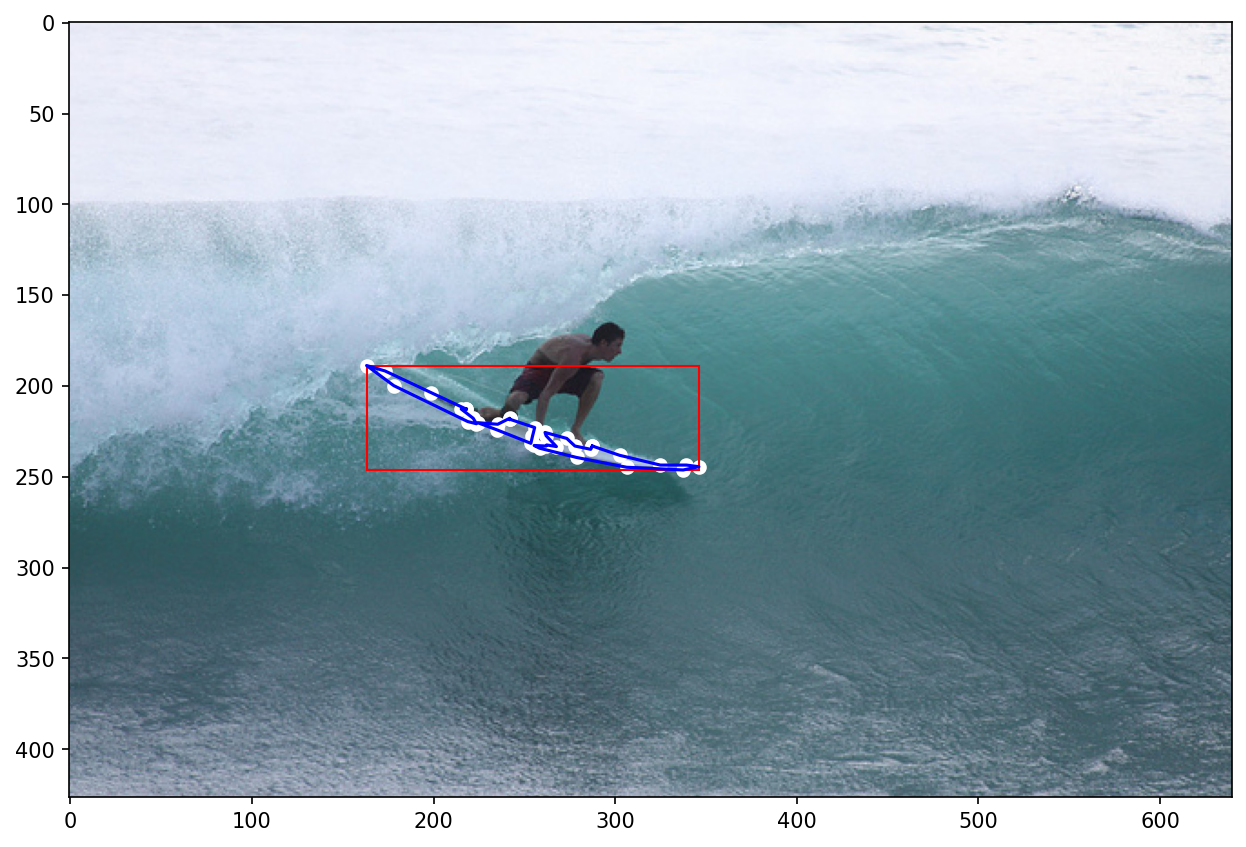

In [44]:
# load and display a random image
img = coco.loadImgs(id_no)[0] #imgIds[np.random.randint(0,len(imgIds))]
I = io.imread('{}//{}/{}'.format(dataDir,dataType,img['file_name']))/255.0 #digital data of an image
print('File Name: {}'.format(img['file_name']), '\n')
print("ID number of the image: ", img['id'], '\n')

for i in imgIds:
    if img['id'] == i:
        if imgIds.index(i) == 0:
            print("The {}st image of the {}".format((imgIds.index(i))+1,filterClasses[0]), '\n')
        elif imgIds.index(i) == 1:
            print("The {}nd image of the {}".format((imgIds.index(i))+1,filterClasses[0]), '\n')
        elif imgIds.index(i) == 2:
            print("The {}rd image of the {}".format((imgIds.index(i))+1,filterClasses[0]), '\n')
        else:
            print("The {}th image of the {}".format((imgIds.index(i))+1,filterClasses[0]), '\n')
            
print('Image directory: {}/images/{}/{}'.format(dataDir,dataType,img['file_name']), '\n')
print("Size of the image(w X h):", img['width'], "X", img['height'], '\n')
print('Date Captured: {}'.format(img['date_captured']), '\n')

# Load and display instance annotations of the selected category
annIds = coco.getAnnIds(imgIds=img['id'], catIds=sportsIds, iscrowd=None)
anns = coco.loadAnns(annIds)
print(anns)

# get number of masks/annotations of the image
print("Number of annotations : ", len(anns), '\n')

anns_id = [] # list of annotation ids
for i in range(len(anns)):
    anns_id.append(anns[i]['id'])
    
print("Id number of the annotations: {}".format(anns_id), '\n')

# Crate figure and axes
fig, ax = plt.subplots(figsize=(10,10), dpi=150)

# Display the image
plt.imshow(I)
plt.axis()

colors = ['blue', 'green', 'red', 'cyan', 'm', 'y', 'k', 'w']
# get the class name of each annotations
a = []
for i in range(len(anns)):
    a.append(getClassName(anns[i]['category_id'], cats))
    
# Now, filter out the repeated images
unique_a = [] #list of unique values of category annotations
for i in range(len(a)):
    if a[i] not in unique_a:
        unique_a.append(a[i])
        
#print out the number of annotation for each type of categories
for i in unique_a:
    ann_name = coco.getCatIds(catNms=i)
    print("Number of ", i, "(class no.", ann_name[0], ") :", a.count(i), '\n')
    
    for j in range(len(anns)):
        if anns[j]['category_id'] == ann_name[0]:
            print("The bbox value (x,y,w,h) for",getClassName(anns[j]['category_id'], cats), ":", anns[j]['bbox'])
            
            [x,y,w,h] = anns[j]['bbox']
            
            rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r',facecolor='none')
            ax.add_patch(rect)
            
            for t in range(len(anns[j]['segmentation'])):
                #making empty list for verifying x and y axis
                xs =[]
                ys =[]
                
                for l in range(len(anns[j]['segmentation'][t])):
                    if l%2 == 0:
                        xs.append(anns[j]['segmentation'][t][l])
                    else:
                        ys.append(anns[j]['segmentation'][t][l])
                #repeat the first point to create a 'closed loop'
                xs.append(xs[0])
                ys.append(ys[0])
                plt.plot(xs, ys, color = colors[j])
                plt.scatter(xs, ys, color=colors[j-1])
            print("Color of {} (id.{})".format(getClassName(anns[j]['category_id'], cats),anns[j]['id']), ":",colors[j])
            print("Area of the{} (id.{})".format(getClassName(anns[j]['category_id'], cats),anns[j]['id']),"segmentation:", round(anns[j]['area'],2), "\n")
            
plt.show()